<a href="https://colab.research.google.com/github/wogomezma/colab/blob/main/Clase_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/dnrpa-robos-recuperos-autos-202201.csv')
df.head()

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-18,1994-06-03,1173,BERAZATEGUI Nº 2,Buenos Aires,Nacional,1994.0,NaN,FURGON VIDRID.C/ASIE,...,Privado,Física,BERAZATEGUI,BUENOS AIRES,Masculino,1972,ARGENTINA,100,6,ARG
1,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-31,2000-10-27,1120,LA MATANZA Nº 03,Buenos Aires,Nacional,2000.0,NaN,SEDAN,...,Privado,Física,LOMAS DEL MIRADOR,BUENOS AIRES,Femenino,1991,ARGENTINA,100,6,ARG
2,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-11,1994-04-28,2086,CAPITAL FEDERAL Nº 086,Ciudad Autónoma de Bs.As.,Nacional,1994.0,NaN,FUR.VIDRIADO C/ASIEN,...,Privado,Física,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1971,PERU,100,2,NaN
3,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-10,1992-03-27,1119,MORON Nº 03,Buenos Aires,Importado,1991.0,NaN,RURAL 4 PTAS.,...,Privado,Física,HAEDO,BUENOS AIRES,No identificado,1982,ARGENTINA,50,6,ARG
4,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-24,2000-11-01,1118,QUILMES Nº 2,Buenos Aires,Nacional,2000.0,NaN,SEDAN 4 PUERTAS,...,Privado,Física,QUILMES OESTE,BUENOS AIRES,Masculino,1947,ARGENTINA,100,6,ARG


In [ ]:
df.shape

(2676, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tramite_tipo                    2676 non-null   object 
 1   tramite_fecha                   2676 non-null   object 
 2   fecha_inscripcion_inicial       2676 non-null   object 
 3   registro_seccional_codigo       2676 non-null   int64  
 4   registro_seccional_descripcion  2676 non-null   object 
 5   registro_seccional_provincia    2676 non-null   object 
 6   automotor_origen                2676 non-null   object 
 7   automotor_anio_modelo           2671 non-null   float64
 8   automotor_tipo_codigo           2601 non-null   object 
 9   automotor_tipo_descripcion      2676 non-null   object 
 10  automotor_marca_codigo          2644 non-null   object 
 11  automotor_marca_descripcion     2676 non-null   object 
 12  automotor_modelo_codigo         26

In [ ]:
df['tramite_fecha']=pd.to_datetime(df['tramite_fecha'])

In [ ]:
ly_accidentes = df.groupby(df['tramite_fecha'].dt.to_period('D')).size()

In [ ]:
ly_accidentes

tramite_fecha
2022-01-03    103
2022-01-04    105
2022-01-05    127
2022-01-06    108
2022-01-07    110
2022-01-10    127
2022-01-11    117
2022-01-12    127
2022-01-13    130
2022-01-14    122
2022-01-17    141
2022-01-18    131
2022-01-19    140
2022-01-20    130
2022-01-21    128
2022-01-24    129
2022-01-25    150
2022-01-26    135
2022-01-27    149
2022-01-28    126
2022-01-31    141
Freq: D, dtype: int64

<Axes: xlabel='tramite_fecha'>

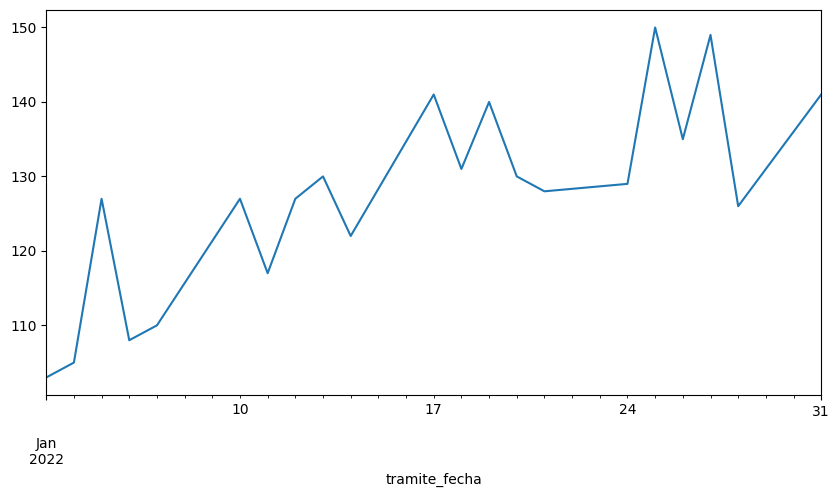

In [ ]:
ly_accidentes.plot.line(figsize=(10,5))

<Axes: xlabel='automotor_marca_descripcion'>

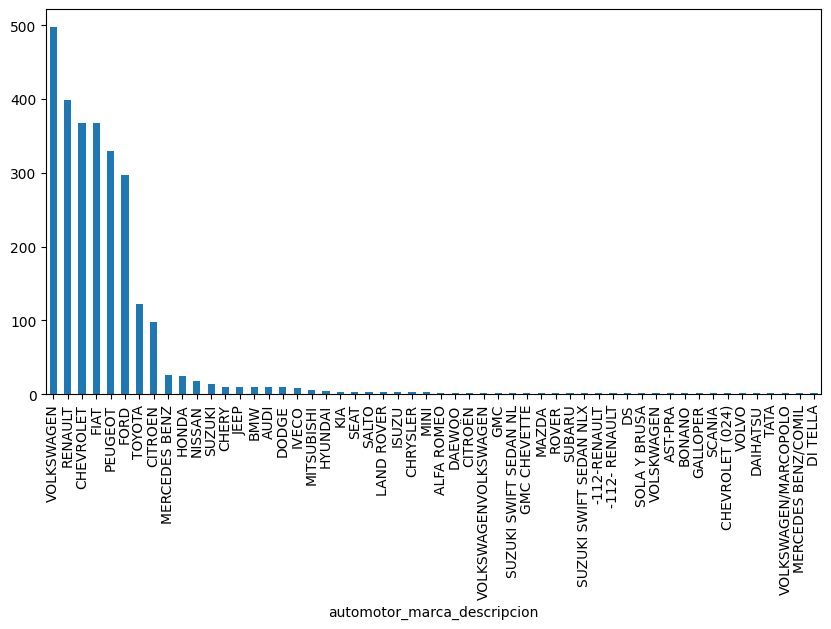

In [ ]:
df['automotor_marca_descripcion'].value_counts().plot(kind='bar',figsize=(10,5))

<Axes: xlabel='automotor_modelo_descripcion'>

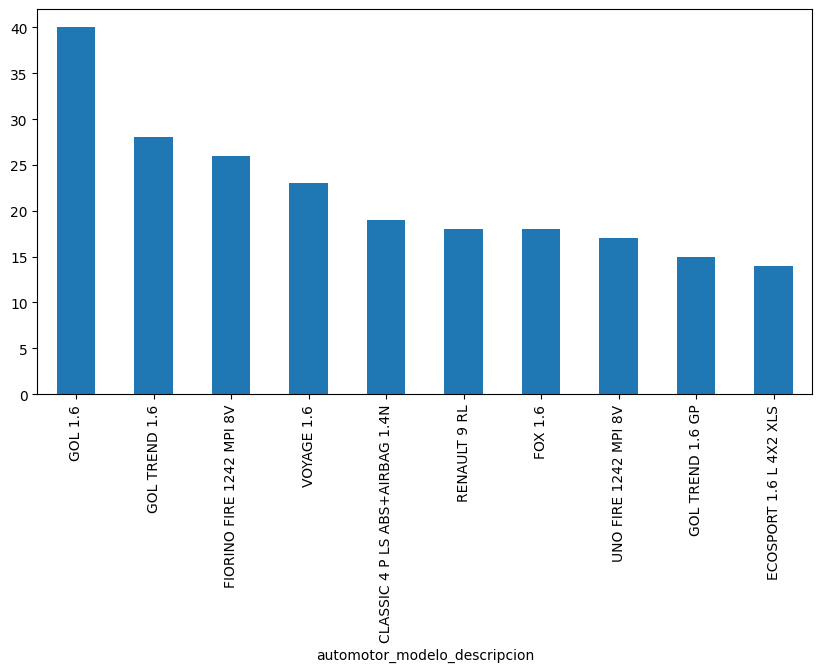

In [ ]:
df['automotor_modelo_descripcion'].value_counts().iloc[0:10].plot(kind='bar',figsize=(10,5))

<Axes: xlabel='titular_genero'>

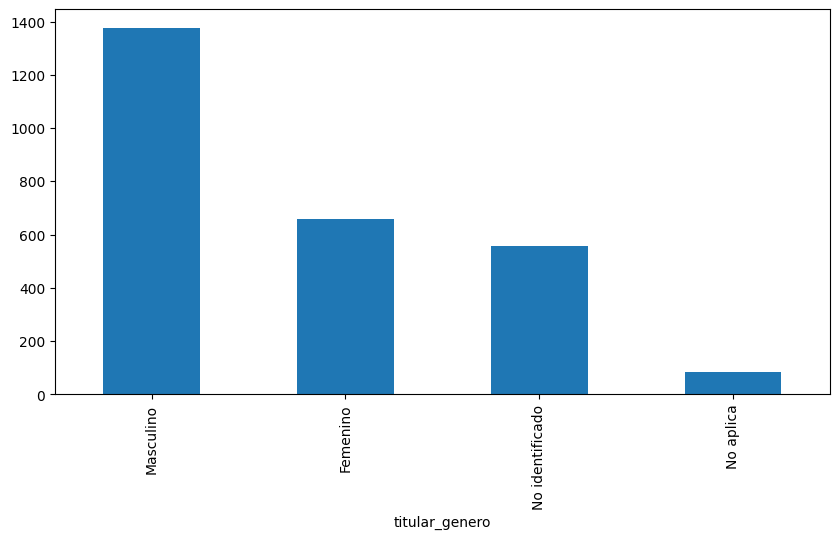

In [ ]:
df['titular_genero'].value_counts().iloc[0:10].plot(kind='bar',figsize=(10,5))

<Axes: xlabel='titular_pais_nacimiento'>

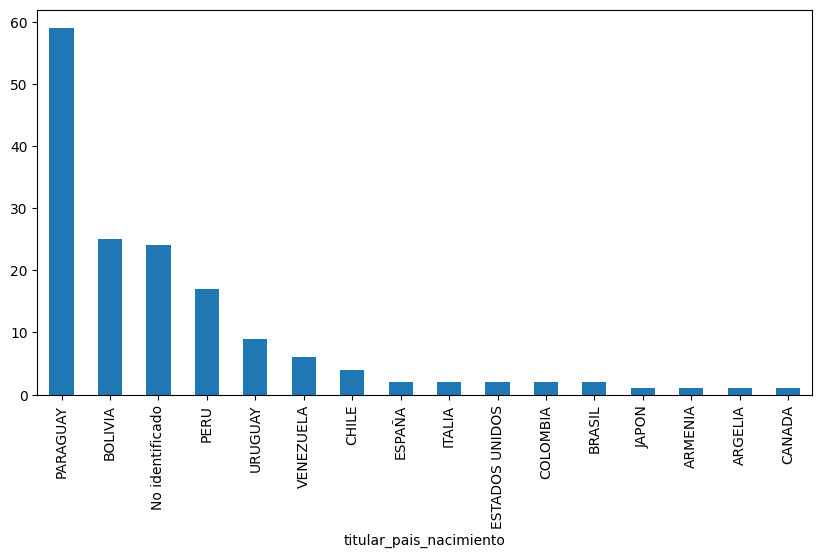

In [ ]:
df['titular_pais_nacimiento'].value_counts().iloc[2:20].plot(kind='bar',figsize=(10,5))

In [ ]:
import sqlite3 as sql

In [ ]:
conn = sql.connect('/content/Chinook_Sqlite.sqlite')

In [ ]:
conn

In [ ]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master where type='table'")

In [ ]:
print(cursor. fetchall())

[('Album',), ('Artist',), ('Customer',), ('Employee',), ('Genre',), ('Invoice',), ('InvoiceLine',), ('MediaType',), ('Playlist',), ('PlaylistTrack',), ('Track',)]


In [ ]:
df_employee = pd.read_sql_query("select * from Employee where City='Lethbridge'", conn)
df_employee.head(20)

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,7,King,Robert,IT Staff,6,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
1,8,Callahan,Laura,IT Staff,6,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [ ]:
import json

In [ ]:
df = pd.read_json('/content/nested_json.json')
df

,school_name,class,students
0,ABC primary school,Year 1,"{'id': 'A001', 'name': 'Tom', 'math': 60, 'phy..."
1,ABC primary school,Year 1,"{'id': 'A002', 'name': 'James', 'math': 89, 'p..."
2,ABC primary school,Year 1,"{'id': 'A003', 'name': 'Jenny', 'math': 79, 'p..."


In [ ]:
import yfinance as yf

In [ ]:
apple = yf.Ticker('AAPL')

In [ ]:
apple

yfinance.Ticker object <AAPL>

In [ ]:
apple.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and pod

In [ ]:
apple_historico = apple.history(period='max')
apple_historico

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087117,0.087117,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-16 00:00:00-04:00,171.750000,173.759995,168.270004,169.380005,73711200,0.0,0.0
2024-04-17 00:00:00-04:00,169.610001,170.649994,168.000000,168.000000,50901200,0.0,0.0
2024-04-18 00:00:00-04:00,168.029999,168.639999,166.550003,167.039993,43122900,0.0,0.0


In [ ]:
apple_historico

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087117,0.087117,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
10925,2024-04-16 00:00:00-04:00,171.750000,173.759995,168.270004,169.380005,73711200,0.0,0.0
10926,2024-04-17 00:00:00-04:00,169.610001,170.649994,168.000000,168.000000,50901200,0.0,0.0
10927,2024-04-18 00:00:00-04:00,168.029999,168.639999,166.550003,167.039993,43122900,0.0,0.0
10928,2024-04-19 00:00:00-04:00,166.210007,166.399994,164.080002,165.000000,67772100,0.0,0.0


<Axes: xlabel='Date'>

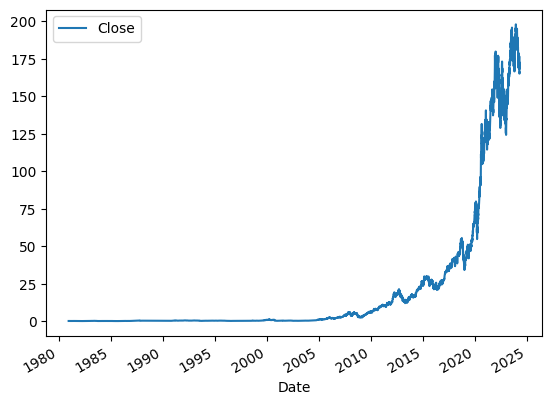

In [ ]:
apple_historico.plot(x="Date",y="Close")

In [ ]:
apple_historico.reset_index(inplace=True)

In [ ]:
apple_historico['Date']=pd.to_datetime(apple_historico['Date'])